In [4]:
import numpy as np
from PIL import Image
from sklearn import preprocessing
import matplotlib.pyplot as plt

## input parameters

In [5]:
iter_size = 5 # number of iterations
K = 3 # number of clusters
inputName = 'input/1.jpg'
resultName = 'result/1-seg.jpg'

## open image

In [6]:
inputImage = Image.open(inputName)
W = inputImage.size[0] # width of image
H = inputImage.size[1] # height of image
W,H

(300, 199)

## vectorize image data

In [7]:
# Initialise data vector with attribute r,g,b,x,y for each pixel
# x , y added for near pixels similarity
# each pixel would be a sample
vector = np.ndarray(shape=(W * H, 5), dtype=float)

# Initialise vector that holds which cluster a pixel is currently in
labels = np.ndarray(shape=(W * H), dtype=int)

# Populate data vector with data from input image
# vector has 5 fields: red, green, blue, x coord, y coord
for y in range(0, H):
    for x in range(0, W):
        xy = (x, y)
        rgb = inputImage.getpixel(xy)
        vector[x+y*W] = rgb[0],rgb[1],rgb[2],x,y

# Standarize the values of our features
vector_scaled = preprocessing.normalize(vector)

## set centers with random intiation

In [10]:
minValue = np.amin(vector_scaled)
maxValue = np.amax(vector_scaled)

centers = np.ndarray(shape=(K,5))
for index, center in enumerate(centers):
    centers[index] = np.random.uniform(minValue+.1, maxValue, 5)


## run algorithm

In [11]:
for iteration in range(iter_size):
    # Set pixels to nearest cluster center
    distances = np.sqrt(((vector_scaled - centers[:, np.newaxis])**2).sum(axis=2))
    closest = np.argmin(distances, axis=0)

    
    # Check if a cluster is ever empty, if so append a random datapoint to it
    clusterToCheck = np.arange(K)   #contains an array with all clusters

    clustersEmpty = np.in1d(clusterToCheck, labels)
    #^ [True True False True * n of clusters] False means empty
    for index, item in enumerate(clustersEmpty):
        if item == False:
            labels[np.random.randint(len(labels))] = index
    
    centers = np.array([vector_scaled[closest==k].mean(axis=0) for k in range(centers.shape[0])])
    
    print("Centers Iteration num", iteration, ": \n", centers)

Centers Iteration num 0 : 
 [[0.14571485 0.3460742  0.4487353  0.63431582 0.18206456]
 [0.52387039 0.40036989 0.1490117  0.4160999  0.51876201]
 [0.25437115 0.31997654 0.30460225 0.45793343 0.52786953]]
Centers Iteration num 1 : 
 [[0.22031887 0.41309291 0.52709211 0.53300563 0.14327831]
 [0.51338973 0.43368248 0.25286481 0.38238853 0.48203475]
 [0.15411127 0.21446516 0.17370051 0.5511023  0.65778702]]
Centers Iteration num 2 : 
 [[0.25375092 0.47905371 0.65429221 0.42650952 0.10565715]
 [0.49673198 0.4406303  0.30339786 0.3819874  0.47783424]
 [0.11902766 0.1803515  0.11332282 0.64222031 0.60572077]]
Centers Iteration num 3 : 
 [[0.25288606 0.48655012 0.67478867 0.40762904 0.09200107]
 [0.47131723 0.43261979 0.30802607 0.37492307 0.50191013]
 [0.11694189 0.17739887 0.10963209 0.66573745 0.58631822]]
Centers Iteration num 4 : 
 [[0.25297284 0.48700744 0.67599041 0.40623858 0.09108737]
 [0.45735816 0.42598345 0.30484627 0.3678888  0.51881655]
 [0.11556781 0.17477269 0.10689875 0.6786004

## set the pixels on original image

In [12]:
# set the pixels on original image to be that of the pixel's cluster's centroid
for index, item in enumerate(closest):
    vector[index][0] = int(round(centers[item][0] * 255))
    vector[index][1] = int(round(centers[item][1] * 255))
    vector[index][2] = int(round(centers[item][2] * 255))

## save image

In [14]:
outputImage = Image.new("RGB", (W, H))
for y in range(H):
    for x in range(W):
        outputImage.putpixel((x, y), (int(vector[y * W + x][0]), 
                                int(vector[y * W + x][1]),
                                int(vector[y * W + x][2])))
outputImage.save(resultName)

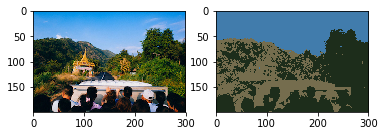

In [15]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(inputImage)
axarr[1].imshow(outputImage)